## K-Means
#### Solved Numerical- Manhatten Distance

![image](https://user-images.githubusercontent.com/45539698/51088377-d2b96c80-1784-11e9-9e02-18fa8a45fc81.png)


![image](https://user-images.githubusercontent.com/45539698/51088322-4149fa80-1784-11e9-8a43-4d040e51810b.png)


![image](https://user-images.githubusercontent.com/45539698/51088296-dbf60980-1783-11e9-92e6-2f2308636934.png)


#### In the above solved numerical, we have chosen k=2. Let's compute K-Means on our IRIS dataset using k=3 (beacuse we know the value of k in advance).

In [18]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [25]:
data = pd.read_csv('C://Users//Lenovo//Documents//Desktop//IPY//iris.csv')
data.head(5)

,sepallength,sepalwidth,petallength,petalwidth,class
0,4.7,3.2,1.3,0.2,1
1,4.6,3.1,1.5,0.2,1
2,5.0,3.6,1.4,0.2,1
3,5.4,3.9,1.7,0.4,1
4,4.6,3.4,1.4,0.3,1


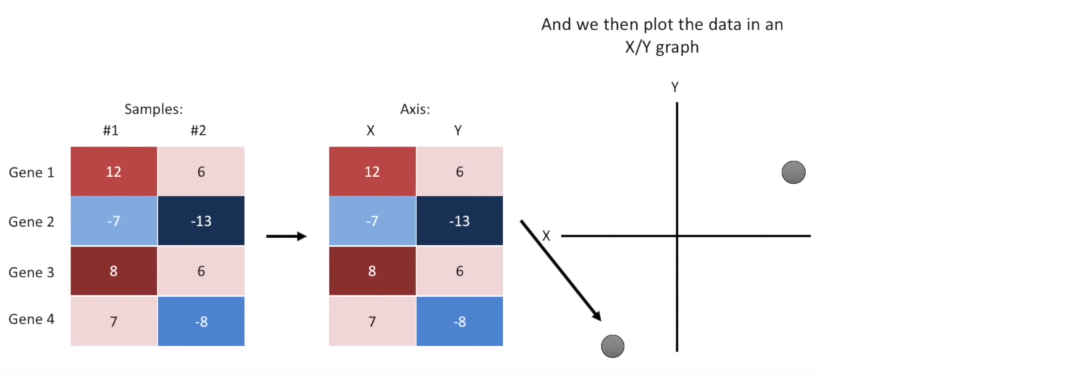

**On similar notion, below plotting has been done**

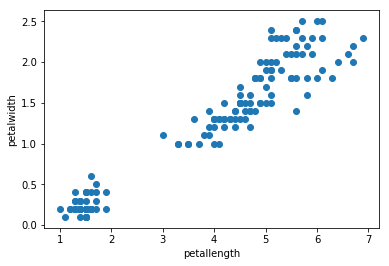

In [5]:
# Scatter plots with two variables: Profit and Sales
plt.scatter(data['petallength'], data['petalwidth'])
plt.xlabel("petallength") 
plt.ylabel("petalwidth")
plt.show()

In [6]:
features=data[['sepallength','sepalwidth','petallength','petalwidth']]
target=data[['class']]

In [8]:
# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

In [9]:
# Create k-mean object
cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1)

# Train model
model = cluster.fit(features_std)

In [10]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### As we have seen that our original dataset had 1,2 and 3 as three different classes. And now we are seeing this 0,1,2 as classes representations. There is nothing to get confused, its just the represntation style, where 0=1,1=2, 2=3. 
#### Also if you notice, we were having all 1s then 2s then 3s or you can say all 0s then 1s then 2s, but after the model output we see some mixed values, and that what is the error !

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


**ADDITIONAL INFORMATION:** <br/>
The iris dataset in sklearn has 0,1,2 representation style by default. To verify: <br/>

**iris = datasets.load_iris() ** <br/>
**y = iris.target** <br/>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  <br/>
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1  <br/>
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2  <br/>
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2  <br/>
 2 2]

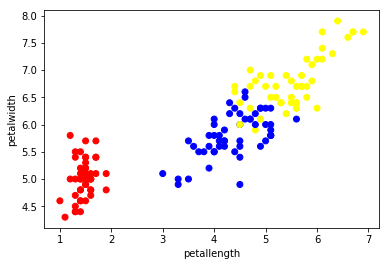

In [14]:
colormap = np.array(['red','blue','yellow'])
plt.scatter(data['petallength'],data['sepallength'],c=colormap[model.labels_])
plt.xlabel("petallength") 
plt.ylabel("petalwidth")
plt.show()

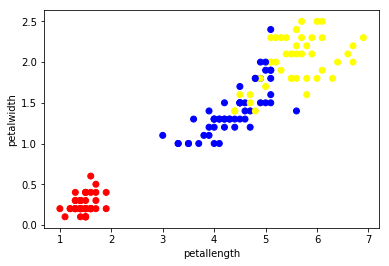

In [15]:
colormap = np.array(['red','blue','yellow'])
plt.scatter(data['petallength'], data['petalwidth'],c=colormap[model.labels_])
plt.xlabel("petallength") 
plt.ylabel("petalwidth")
plt.show()

In [45]:
# Create new observation
new_observation = [[0.8, 0.8, 0.8, 0.8]]

# Predict observation's cluster
model.predict(new_observation)

array([2])

#### For IRIS dataset we knew that the cluster size will be 3. Now lets see how to detemine the k.There are commonly 2 ways to compute the value of k: [1] Elbow Method [2]  Silhouette Method

## Elbow Method 

In [19]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features_std)
    Sum_of_squared_distances.append(km.inertia_)

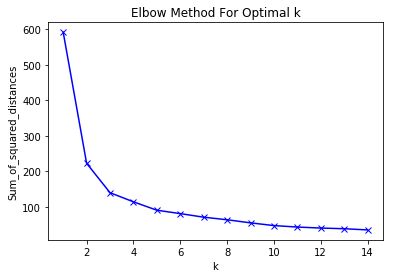

In [20]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Conclusion:** From this graph we can conclude the right number of Cluster = 2 and/or 3

##  Silhouette Method
The Mathematics behind Shilhoutte Method is not covered in this Notebook. We are using evaluating silhouette_score from sklearn. 

In [30]:
from sklearn.metrics import silhouette_score

### For cluster Size = 2

In [32]:
model = KMeans(n_clusters=2, random_state=1).fit(features_std)

# Get predicted classes
models = model.labels_

# Evaluate model
silhouette_score(features_std, models)

0.5793323219711215

### For cluster Size = 3

In [33]:
model = KMeans(n_clusters=3, random_state=1).fit(features_std)

# Get predicted classes
models = model.labels_

# Evaluate model
silhouette_score(features_std, models)

0.4553958764553292

### For cluster Size = 4

In [34]:
model = KMeans(n_clusters=4, random_state=1).fit(features_std)

# Get predicted classes
models = model.labels_

# Evaluate model
silhouette_score(features_std, models)

0.41453398995285257

## For cluster Size = 5

In [35]:
model = KMeans(n_clusters=5, random_state=1).fit(features_std)

# Get predicted classes
models = model.labels_

# Evaluate model
silhouette_score(features_std, models)

0.3443092159955322

**Conclusion:** From this graph we can conclude the right number of Cluster = 2 and/or 3

##  Mini-Batch K-Means

In [21]:
from sklearn.cluster import MiniBatchKMeans

In [22]:
# Create k-mean object
cluster = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100)

# Train model
model = cluster.fit(features_std)

In [23]:
# Create new observation
new_observation = [[0.8, 0.8, 0.8, 0.8]]

# Predict observation's cluster
model.predict(new_observation)

array([0])

#### Difference between K-Means and Mini-Batch K-Means
**The Problem**

Suppose we have a dataset of 500000 records, and we want to divide them into 100 clusters. The complexity of the original K-Means clustering clustering algorithm is O(n*K*I*f), where n is the number of records, K is the number of clusters we want, I is the number of iterations and f is the number of features in a particular record. It can be clearly seen that this will take a lifetime for the original algorithm to cluster data.

**The Idea**

The idea of the algorithm is to represent the dataset by a smaller subset of the data. For example, for a dataset of 500000 records we will actually use only about say 100000 entries for training. You may say that the obtained cluster centroids may not be a good representation of how the actual clusters should be, but the algorithm actually makes sure that the model generalizes well over whole of the dataset. **It does this in far lesser time than the original algorithm**.

**The Algorithm**

The algorithm takes small batches(randomly chosen) of the dataset for each iteration. It then assigns a cluster to each data point in the batch, depending on the previous locations of the cluster centroids. It then updates the locations of cluster centroids based on the new points from the batch. The update is a gradient descent update, which is significantly faster than a normal Batch K-Means update. 

![image](https://user-images.githubusercontent.com/45539698/51653131-27948880-1fb8-11e9-83a8-818b84d01bc9.png)


## Meanshift

In [24]:
from sklearn.cluster import MeanShift

In [25]:
# Create meanshift object
cluster = MeanShift(n_jobs=-1)

# Train model
model = cluster.fit(features_std)

In [26]:
# Create new observation
new_observation = [[0.8, 0.8, 0.8, 0.8]]

# Predict observation's cluster
model.predict(new_observation)

array([0], dtype=int64)